In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'Label'])

In [3]:
df = pd.read_csv('/content/kddcup.data',header=None,names=columns)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90696 entries, 0 to 90695
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     90696 non-null  int64  
 1   protocol_type                90696 non-null  object 
 2   service                      90696 non-null  object 
 3   flag                         90696 non-null  object 
 4   src_bytes                    90696 non-null  int64  
 5   dst_bytes                    90696 non-null  int64  
 6   land                         90696 non-null  int64  
 7   wrong_fragment               90696 non-null  int64  
 8   urgent                       90696 non-null  int64  
 9   hot                          90696 non-null  int64  
 10  num_failed_logins            90696 non-null  int64  
 11  logged_in                    90696 non-null  int64  
 12  num_compromised              90696 non-null  int64  
 13  root_shell      

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [6]:
(df['Label'].value_counts())

Label
normal.             77888
smurf.              12788
neptune.               15
buffer_overflow.        2
loadmodule.             1
perl.                   1
Name: count, dtype: int64

In [11]:
# take all the normal data and some of the abnormal data so the total data points are 1,000,000
df_normal = df[df['Label'] == 'normal.']
df_abnormal = df[df['Label'] != 'normal.']
for i in range(0,10):
    df_abnormal = df_abnormal.iloc[np.random.permutation(len(df_abnormal))]
    df_normal = df_normal.iloc[np.random.permutation(len(df_normal))]
df_abnormal = df_abnormal.sample(90696 - df_normal.shape[0])

In [12]:
df_normal.shape, df_abnormal.shape

((77888, 41), (12808, 41))

In [13]:
df_normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
9584,0,tcp,auth,SF,9,36,0,0,0,0,...,20.0,0.16,0.1,0.02,0.20,0.00,0.00,0.0,0.0,normal.
66142,0,tcp,http,SF,309,2728,0,0,0,0,...,255.0,1.00,0.0,0.02,0.02,0.00,0.00,0.0,0.0,normal.
49145,0,tcp,http,SF,371,1062,0,0,0,0,...,215.0,1.00,0.0,0.01,0.03,0.00,0.00,0.0,0.0,normal.
47357,0,tcp,http,SF,219,427,0,0,0,0,...,255.0,1.00,0.0,0.17,0.04,0.00,0.00,0.0,0.0,normal.
69760,0,tcp,http,SF,234,844,0,0,0,0,...,255.0,1.00,0.0,0.00,0.01,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34260,0,tcp,http,SF,232,68621,0,0,0,0,...,255.0,1.00,0.0,0.10,0.04,0.00,0.00,0.0,0.0,normal.
74149,0,tcp,http,SF,233,3091,0,0,0,0,...,255.0,1.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,normal.
5953,0,tcp,http,SF,333,1819,0,0,0,0,...,255.0,1.00,0.0,0.00,0.00,0.01,0.01,0.0,0.0,normal.
32008,0,tcp,http,SF,310,347,0,0,0,0,...,255.0,1.00,0.0,0.25,0.08,0.00,0.00,0.0,0.0,normal.


In [14]:
df_abnormal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
79385,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
88227,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
81988,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
85547,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
83276,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89611,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
78047,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,141.0,0.55,0.01,0.55,0.0,0.0,0.0,0.0,0.0,smurf.
89194,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
79403,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.


In [15]:
# combine the normal and abnormal data
df = pd.concat([df_normal, df_abnormal])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
9584,0,tcp,auth,SF,9,36,0,0,0,0,...,20.0,0.16,0.10,0.02,0.20,0.0,0.0,0.0,0.0,normal.
66142,0,tcp,http,SF,309,2728,0,0,0,0,...,255.0,1.00,0.00,0.02,0.02,0.0,0.0,0.0,0.0,normal.
49145,0,tcp,http,SF,371,1062,0,0,0,0,...,215.0,1.00,0.00,0.01,0.03,0.0,0.0,0.0,0.0,normal.
47357,0,tcp,http,SF,219,427,0,0,0,0,...,255.0,1.00,0.00,0.17,0.04,0.0,0.0,0.0,0.0,normal.
69760,0,tcp,http,SF,234,844,0,0,0,0,...,255.0,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89611,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
78047,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,141.0,0.55,0.01,0.55,0.00,0.0,0.0,0.0,0.0,smurf.
89194,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
79403,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.


In [16]:
# compare the percentage of each label
# (df['Label'].value_counts() / df.shape[0]) * 100
(df['Label'].value_counts())

Label
normal.             77888
smurf.              12788
neptune.               15
buffer_overflow.        2
perl.                   1
loadmodule.             1
Name: count, dtype: int64

In [17]:
for f in range(0,10):
    df = df.iloc[np.random.permutation(len(df))]

In [18]:
# split X and y data
x = df.drop('Label', axis = 1)
y = df['Label']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
)
categorical_columns = ["protocol_type", "service", "flag"]

ordinal_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", ordinal_encoder, categorical_columns),
    ],
    remainder="passthrough",
)
x = preprocessor.fit_transform(x)
y = np.where(y == 'normal.',1,0) # anomaly = 0, normal = 1

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 42)
x_train = df_normal.drop('Label', axis = 1) # remake x_train with only normal data
x_train = preprocessor.fit_transform(x_train)

In [21]:
iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train)
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 1, 0) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

In [22]:
y_pred1

array([0, 0, 1, ..., 1, 1, 1])

In [23]:
y_pred2

array([-0.07138345, -0.09720509,  0.15771413, ...,  0.15434827,
        0.1032771 ,  0.15656586])

In [24]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

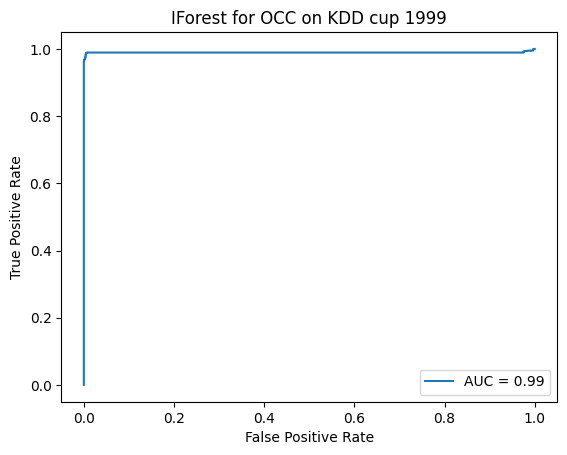

In [25]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)
curve.plot()
plt.title("IForest for OCC on KDD cup 1999")
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print("AUC score (discrete prediction): ", auc1 * 100)
print("AUC score (continuous prediction):", auc2 * 100)

AUC score (discrete prediction):  97.43918875553558
AUC score (continuous prediction): 98.92778047350234


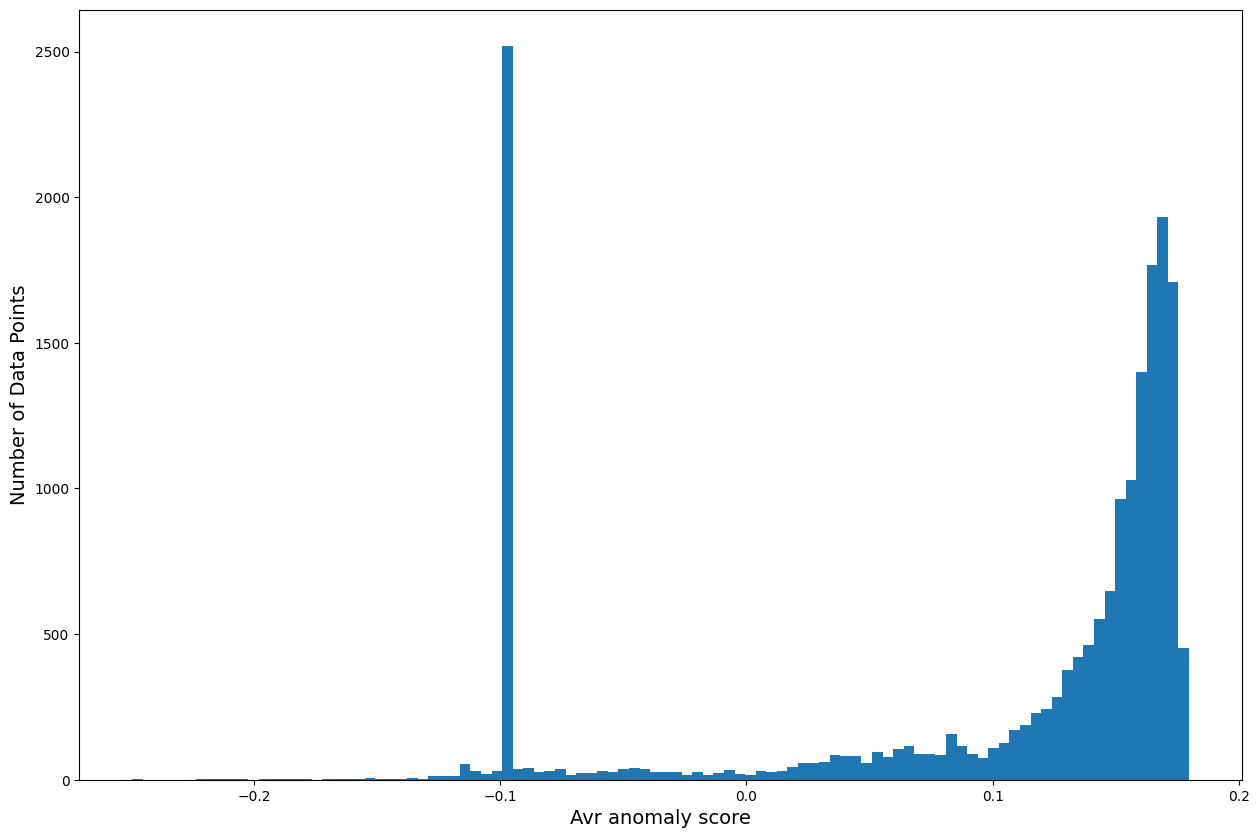

In [27]:
plt.figure(figsize = (15, 10))

plt.hist(y_pred2, bins=100)

plt.xlabel('Avr anomaly score', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()